<a href="https://colab.research.google.com/github/KristineKharyl/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_5_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5 A

One of the classic public datasets used to demonstrate binary classification is the titanic dataset which lists 891 of the the passengers aboard the RMS Titanic when it sank on April 15, 1912.

The dataset includes the name of each passenger as well as other information such as the fare class, the fare price, the person's age and gender, and whether that person survived the sinking of the ship.

In this example, you will build a binary-classification model that predicts whether a passenger will survive. We will use logistic regression as the learning algorithm.

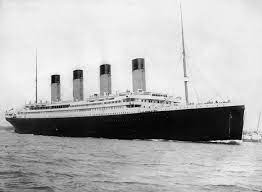

In [225]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [226]:
df = load_dataset("titanic")

In [227]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 1. Filter the dataset to remove columns that won't be used,

In [228]:
# put your answer here
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
df = df.drop(columns, axis=1)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second
887,1,1,female,19.0,0,0,30.0000,S,First
888,0,3,female,NaN,1,2,23.4500,S,Third
889,1,1,male,26.0,0,0,30.0000,C,First


#### 2. Use `get_dummies()` function to convert the "Sex" and "Pclass" columns into ones and zeroes.

In [229]:
# put your answer here
df = df[['survived', 'age', 'sex', 'pclass']]
df = pd.get_dummies(df, columns=['sex', 'pclass'])
df.dropna(inplace=True)
df.head()


,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


#### 3. Remove rows with missing values.

In [230]:
# put your answer here
df.dropna(inplace=True)
df

,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...
885,0,39.0,1,0,0,0,1
886,0,27.0,0,1,0,1,0
887,1,19.0,1,0,1,0,0
889,1,26.0,0,1,1,0,0


#### 4. Split the dataset into a training and test set.

In [231]:
# put your answer here
x = df.drop('survived', axis=1)
y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

#### 5. Create a new instance of the Logistic Regression class

In [232]:
# put your answer here
model = LogisticRegression(random_state=0)


#### 6. Train the model using the `fit()` method

In [233]:
# put your answer here
model.fit(x_train, y_train)
#to get the accuracy score
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

#### 7. Get an accuracy score.

In [234]:
# put your answer here
accuracy_score(y_pred, y_test)


0.8321678321678322

### Use the model to make predictions

#### 8. Use  the model to predict whether a 30-year-old female traveling in first class will survive the voyage.

In [235]:
df

,survived,age,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1
...,...,...,...,...,...,...,...
885,0,39.0,1,0,0,0,1
886,0,27.0,0,1,0,1,0
887,1,19.0,1,0,1,0,0
889,1,26.0,0,1,1,0,0


In [236]:
# put your answer here
female = [[30, 1, 0, 1, 0, 0]] #age, sex_f, sex_m, pclass_1, pclass_2, pclass_3
model.predict(female)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

#### 9. What is the probability that a 30-year-old female traveling in first class will survive?

In [237]:
# put your answer here
probability = model.predict_proba(female)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 91.6%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 10. What is the probability that a 60-year-old male traveling in third class will survive??

In [238]:
# put your answer here

male = [[60, 0, 1, 0, 0, 1]] #age, sex_f, sex_m, pclass_1, pclass_2, pclass_3
model.predict(male)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [239]:
# put your answer here
probability = model.predict_proba(male)[0][1]
print(f'Probability of survival: {probability:.1%}')

Probability of survival: 2.9%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
